참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# Recurrent Neural network (RNN)


## 파이토치의 `nn.RNN()`

- 파이토치에서는 `nn.RNN()`을 통해서 RNN 셀을 구현합니다.

In [2]:
import torch
import torch.nn as nn

- 이제 입력의 크기 ($d$)와 은닉 상태의 크기 $D_h$를 정의합니다. 은닉 상태의 크기는 대표적인 RNN의 하이퍼파라미터입니다. 여기서 입력의 크기는 매 시점마다 들어가는 입력의 크기를 의미합니다.

In [3]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

- 이제 입력 텐서를 정의합니다. 입력 텐서는 (배치 크기 × 시점의 수 × 매 시점마다 들어가는 입력)의 크기를 가집니다. 여기서는 배치 크기는 1, 10번의 시점동안 5차원의 입력 벡터가 들어가도록 텐서를 정의합니다.

In [5]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

이제 `nn.RNN()`을 사용하여 RNN의 셀을 만듭니다. 인자로 입력의 크기, 은닉 상태의 크기를 정의해주고, `batch_first=True`를 통해서 입력 텐서의 첫번째 차원이 배치 크기임을 알려줍니다.

In [6]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

- 입력 텐서를 RNN 셀에 입력하여 출력을 확인해봅시다.

In [7]:
outputs, _status = cell(inputs)

- RNN 셀은 두 개의 입력을 리턴하는데,
  + 첫번째 리턴값은 모든 시점(timesteps)의 은닉 상태들이며,
  + 두번째 리턴값은 마지막 시점(timestep)의 은닉 상태입니다.
- 우선 첫번째 리턴값에 대해서 크기를 확인해봅시다.

In [8]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


- 첫번째 리턴값의 은닉 상태들은 (1, 10, 8)의 크기를 가집니다. 이는 10번의 시점동안 8차원의 은닉상태가 출력되었다는 의미입니다. 두번째 리턴값. 다시 말해 마지막 시점의 은닉 상태의 크기를 확인해보겠습니다.

In [9]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


- 참고로 `nn.RNN()`은 렉처노트에서 hidden state를 업데이트하는 $$h_t = f_W(h_{t-1},x_t) $$ 를 모델링합니다. $f_W$의 경우 기본값은 tanh 함수이며 이를 ReLU로 바꾸기 위해서는 다음과 같이 수행할 수 있습니다.

In [10]:
# RNN 모델 정의 - tanh
rnn_tanh = nn.RNN(input_size=5, hidden_size=8, num_layers=1, batch_first=True, nonlinearity='tanh')

# RNN 모델 정의 - relu
rnn_relu = nn.RNN(input_size=5, hidden_size=8, num_layers=1, batch_first=True, nonlinearity='relu')

- output을 업데이트하는 $$y_t = f_{W_y}(h_t) $$ 의 경우 일반적으로 linear하게 $$y_t = W_yh_t + b_y $$를 사용하는 것이 Vanilla RNN이며 `nn.Linear()`을 한 층 더 쌓아서 활용합니다.

## 깊은 순환 신경망(Deep Recurrent Neural Network)

<img src='https://drive.google.com/uc?export=download&id=1hLmZGn0mRRAzxfQxMswRnqqTXLsuxBL0' width="500" height ="400" /><br>

- RNN도 다수의 은닉층을 가질 수 있고, 이를 깊은 순환 신경망(Deep Recurrent Neural Network)이라고 합니다.
- 위의 그림은 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망의 모습을 보여줍니다.
- 깊은 순환 신경망을 파이토치로 구현할 때는 `nn.RNN()`의 인자인 `num_layers`에 값을 전달하여 층을 쌓습니다. 층이 2개인 깊은 순환 신경망의 경우, 앞서 실습했던 임의의 입력에 대해서 출력이 어떻게 달라지는지 확인해봅시다.

In [11]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)
outputs, _status = cell(inputs)
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [ ]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [ ]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)

In [ ]:
outputs, _status = cell(inputs)

In [ ]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


- 첫번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라지지 않았습니다. 여기서는 마지막 층의 모든 시점의 은닉 상태들입니다.

In [ ]:
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([2, 1, 8])


- 두번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라졌는데, 여기서 크기는 (층의 개수, 배치 크기, 은닉 상태의 크기)에 해당됩니다.

## 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

- 양방향 순환 신경망은 시점 $t$에서의 출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반합니다.

- 영어 빈칸 채우기 문제에 비유하여 보겠습니다.
  + 예시) Exercise is very effective at [&nbsp; &nbsp;] belly fat.
    + (보기 1) reducing
    + (보기 2) increasing
    + (보기 3) multiplying
  + '운동은 복부 지방을 [&nbsp;] 효과적이다'라는 영어 문장이고, 정답은 reducing(줄이는 것)입니다.
  + 그런데 위의 영어 빈 칸 채우기 문제를 잘 생각해보면 정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족합니다.
  + 목적어인 belly fat(복부 지방)를 모르는 상태라면 정답을 결정하기가 어렵습니다.

- 즉, RNN이 과거 시점(time step)의 데이터들을 참고해서, 찾고자하는 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많습니다. 그래서 이전 시점의 데이터뿐만 아니라, 이후 시점의 데이터도 힌트로 활용하기 위해서 고안된 것이 양방향 RNN (Bidirectional Recurrent Neural Network) 입니다.

<img src='https://drive.google.com/uc?export=download&id=15KQcV0erI2y-7nmQzDbexKnuIr-AdKRn' width="" height ="" /><br>

- 양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다.
  + 첫번째 메모리 셀은 앞에서 배운 것처럼 **앞 시점의 은닉 상태(Forward States)**를 전달받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다.
  +  두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 초록색 메모리 셀에 해당됩니다.
- 이 두 개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용됩니다.

<img src='https://drive.google.com/uc?export=download&id=1aRU9mkanwv5CxY40R7eNn33Ld3odTI3Z' width="" height ="" /><br>

- 물론, 양방향 RNN도 다수의 은닉층을 가질 수 있습니다. 위의 그림은 양방향 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 양방향 순환 신경망의 모습을 보여줍니다.

- 다른 인공 신경망 모델들도 마찬가지이지만, 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아닙니다. 은닉층을 추가하면, 학습할 수 있는 양이 많아지지만 또한 반대로 훈련 데이터 또한 그만큼 많이 필요합니다.

- 양방향 순환 신경망을 파이토치로 구현할 때는 `nn.RNN()`의 인자인 bidirectional에 값을 True로 전달하면 됩니다. 이번에는 층이 2개인 깊은 순환 신경망이면서 양방향인 경우, 앞서 실습했던 임의의 입력에 대해서 출력이 어떻게 달라지는지 확인해봅시다.

In [12]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [13]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [14]:
outputs, _status = cell(inputs)

In [15]:
print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)

torch.Size([1, 10, 16])


- 첫번째 리턴값의 크기는 단뱡 RNN 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었습니다. 여기서는 (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)의 크기를 가집니다. 이는 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문입니다.

In [ ]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])


- 두번째 리턴값의 크기는 (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)를 가집니다. 이는 정방향 기준으로는 마지막 시점에 해당되면서, 역방향 기준에서는 첫번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아 올린 결과값입니다.

__코드 실습 1. 문자 단위 RNN (Char RNN)__

- 이번 챕터에서는 모든 시점의 입력에 대해서 모든 시점에 대해서 출력을 하는 다대다 RNN을 구현해봅시다.
- 다대다 RNN은 대표적으로 품사 태깅, 개체명 인식 등에서 사용됩니다.

- 문자 단위 RNN(Char RNN) : RNN의 입출력의 단위가 단어 레벨(word-level)이 아니라 문자 레벨(character-level)로 하여 RNN을 구현한다면, 이를 문자 단위 RNN이라고 합니다.
- 문자 단위 RNN을 다대다 구조로 구현해봅시다.

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

### (1) 훈련 데이터 전처리하기

- 여기서는 문자 시퀀스 apple을 입력받으면 pple!를 출력하는 RNN을 구현해볼 겁니다.
- 이렇게 구현하는 어떤 의미가 있지는 않습니다. 그저 RNN의 동작을 이해하기 위한 목적입니다.

- 입력 데이터와 레이블 데이터에 대해서 문자 집합(voabulary)을 만듭니다.
- 여기서 문자 집합은 중복을 제거한 문자들의 집합입니다.

In [17]:
input_str = 'apple'
label_str = 'pple!'
# apple!
# a,p,l,e,!
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))
char_vocab

문자 집합의 크기 : 5


['!', 'a', 'e', 'l', 'p']

- 현재 문자 집합에는 총 5개의 문자가 있습니다. !, a, e, l, p입니다.
- 이제 하이퍼파라미터를 정의해줍니다. 이때 입력은 원-핫 벡터를 사용할 것이므로 입력의 크기는 문자 집합의 크기여야만 합니다.

In [18]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

이제 문자 집합에 고유한 정수를 부여합니다.

In [19]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


- !은 0, a는 1, e는 2, l은 3, p는 4가 부여되었습니다.
- 나중에 예측 결과를 다시 문자 시퀀스로 보기위해서 반대로 정수로부터 문자를 얻을 수 있는 `index_to_char`을 만듭니다.

In [20]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


- 이제 입력 데이터와 레이블 데이터의 각 문자들을 정수로 맵핑합니다.

In [21]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data) # apple
print(y_data) # pple!

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


- 파이토치의 `nn.RNN()`은 기본적으로 3차원 텐서를 입력받습니다. 그렇기 때문에 배치 차원을 추가해줍니다.

In [22]:
# 배치 차원 추가
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


- 입력 시퀀스의 각 문자들을 원-핫 벡터로 바꿔줍니다.

In [23]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


- 입력 데이터와 레이블 데이터를 텐서로 바꿔줍니다.

In [24]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-24-c1bfbd518a63>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X = torch.FloatTensor(x_one_hot)


- 각 텐서의 크기는 다음과 같습니다

In [25]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


### (2) 모델 구현하기

- 이제 RNN 모델을 구현해봅시다. 아래에서 `fc`는 완전 연결층(fully-connected layer)을 의미하며 출력층으로 사용됩니다.

In [26]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

- 클래스로 정의한 모델을 net에 저장합니다.

In [27]:
net = Net(input_size, hidden_size, output_size)

- 이제 입력된 모델에 입력을 넣어서 출력의 크기를 확인해봅시다.

In [28]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서
# vocabulrary : ! a e l p
# x1 : a  -->> y1 -> e (p)
# x2 : p  -->> y2 -> e (p)
# x3 : p  -->> y3 -> e (l)
# x4 : l  -->> y4 -> e (e)
# x5 : e  -->> y5 -> e (!)

torch.Size([1, 5, 5])


- (1, 5, 5)의 크기를 가지는데 각각 배치 차원, 시점(timesteps), 출력의 크기입니다.
- 나중에 정확도를 측정할 때는 이를 모두 펼쳐서 계산하게 되는데, 이때는 view를 사용하여 배치 차원과 시점 차원을 하나로 만듭니다.

In [29]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


- 차원이 (5, 5)가 된 것을 볼 수 있습니다. 이제 레이블 데이터의 크기를 다시 복습봅시다.

In [30]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


- 레이블 데이터는 (1, 5)의 크기를 가지는데, 마찬가지로 나중에 정확도를 측정할 때는 이걸 펼쳐서 계산할 예정입니다.이 경우 (5)의 크기를 가지게 됩니다.



- 이제 옵티마이저와 손실 함수를 정의합니다.

In [31]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

총 100번의 에포크를 학습합니다.

In [32]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.5076545476913452 prediction:  [[4 4 4 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppep
1 loss:  1.3000117540359497 prediction:  [[4 4 4 4 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  ppppp
2 loss:  1.0671706199645996 prediction:  [[4 4 4 4 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppp!
3 loss:  0.8228586912155151 prediction:  [[4 4 4 4 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppp!
4 loss:  0.6163566708564758 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
5 loss:  0.44676756858825684 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  0.3153727650642395 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.21685555577278137 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.1435837745666504 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.0929882675409317 prediction:  [[4 4 3 2 0]

__코드 실습 2. 문자 단위 RNN (Char RNN)__

- 이번 챕터에서는 더 많은 데이터 문자 단위 RNN을 구현합니다.

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

### (1) 훈련 데이터 전처리하기

In [35]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

# i=1 : if you wan -> f you want
# i=2 : f you want ->  you want
# i=3 :  you want  -> you want t

- 문자 집합을 생성하고, 각 문자에 고유한 정수를 부여합니다.

In [36]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩
print(char_dic) # 공백도 여기서는 하나의 원소

{'h': 0, 'g': 1, 'w': 2, 'k': 3, 'r': 4, 'e': 5, "'": 6, 'c': 7, 'u': 8, 'n': 9, ',': 10, 'o': 11, 't': 12, 'p': 13, 'm': 14, '.': 15, 'i': 16, 'a': 17, ' ': 18, 's': 19, 'y': 20, 'l': 21, 'd': 22, 'b': 23, 'f': 24}


- 각 문자에 정수가 부여되었으며, 총 25개의 문자가 존재합니다. 문자 집합의 크기를 확인해봅시다.

In [38]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


- 문자 집합의 크기는 25이며, 입력을 원-핫 벡터로 사용할 것이므로 이는 매 시점마다 들어갈 입력의 크기이기도 합니다.

- 이제 하이퍼파라미터를 설정합니다. hidden_size(은닉 상태의 크기)를 입력의 크기와 동일하게 줬는데, 이는 사용자의 선택으로 다른 값을 줘도 무방합니다.

- 그리고 sequence_length라는 변수를 선언했는데, 우리가 앞서 만든 샘플을 10개 단위로 끊어서 샘플을 만들 예정이기 때문입니다. 이는 뒤에서 더 자세히 보겠습니다.

In [40]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

- 다음은 임의로 지정한 sequence_length 값인 10의 단위로 샘플들을 잘라서 데이터를 만드는 모습을 보여줍니다.

In [41]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

- 총 170개의 샘플이 생성되었습니다.
- 그리고 각 샘플의 각 문자들은 고유한 정수로 인코딩이 된 상태입니다.
- 첫번째 샘플의 입력 데이터와 레이블 데이터를 출력해봅시다.

In [42]:
print(x_data[0])
print(y_data[0])

[16, 24, 18, 20, 11, 8, 18, 2, 17, 9]
[24, 18, 20, 11, 8, 18, 2, 17, 9, 12]


- 한 칸씩 쉬프트 된 시퀀스가 정상적으로 출력되는 것을 볼 수 있습니다.
- 이제 입력 시퀀스에 대해서 원-핫 인코딩을 수행하고, 입력 데이터와 레이블 데이터를 텐서로 변환합니다.

In [43]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

- 이제 훈련 데이터와 레이블 데이터의 크기를 확인해봅시다.

In [44]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


- 원-핫 인코딩 된 결과를 보기 위해서 첫번째 샘플만 출력해봅시다.

In [45]:
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

- 레이블 데이터의 첫번째 샘플도 출력해봅시다.

In [46]:
print(Y[0])

tensor([24, 18, 20, 11,  8, 18,  2, 17,  9, 12])


- 위 레이블 시퀀스는 f you want에 해당됩니다. 이제 모델을 설계합니다.

### (2) 모델 구현하기

- 모델은 앞서 실습한 문자 단위 RNN 챕터와 거의 동일합니다. 다만 이번에는 은닉층을 두 개 쌓을 겁니다.

In [47]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x


In [48]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

- `nn.RNN()` 안에 `num_layers`라는 인자를 사용합니다. 이는 은닉층을 몇 개 쌓을 것인지를 의미합니다.
- 모델 선언 시 layers라는 인자에 2를 전달하여 은닉층을 두 개 쌓습니다.
- 비용 함수와 옵티마이저를 선언합니다.

In [49]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

- 이제 모델에 입력을 넣어서 출력의 크기를 확인해봅시다.

In [50]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


- (170, 10, 25)의 크기를 가지는데 각각 배치 차원, 시점(timesteps), 출력의 크기입니다.
- 나중에 정확도를 측정할 때는 이를 모두 펼쳐서 계산하게 되는데, 이때는 view를 사용하여 배치 차원과 시점 차원을 하나로 만듭니다.

In [51]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.


torch.Size([1700, 25])


차원이 (1700, 25)가 된 것을 볼 수 있습니다. 이제 레이블 데이터의 크기를 다시 복구합시다.

In [52]:
print(Y.shape)
print(Y.view(-1).shape)


torch.Size([170, 10])
torch.Size([1700])


- 레이블 데이터는 (170, 10)의 크기를 가지는데, 마찬가지로 나중에 정확도를 측정할 때는 이걸 펼쳐서 계산할 예정입니다. 이 경우 (1700)의 크기를 가지게 됩니다.

In [53]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)


sbnb,lllllsnlnl'lll'lnlb'llsbb,lllnblllllllblllllllnlnl'llllnlnlll'llnbll'lnlbl'llllnblll'nnl'llllnslblnlbllllllbbblnsllbllllnblbll'llllsll,lnnbllll'llnlbl'bsll'lllbllslnlnl'llb,b
rddddddddddddddddrdddddddrddddddddddddddddddddddddddddddrdddddddddddddddddddddddddddddddddddddrdtddddddddddddddddddddddddrddddddddddrdtddddddddddddddrdddddddddddddddrddddddddrdddd
ttttttttttttttttttttt t t t t t ttt tttttttttttttttttttttttttttttttt t t tttt t t t t ttttttttttttttttttt t t ttt t t ttt tttttttttt tttttttttttttttt ttt ttttt ttttttttttttttttttt
 eeywd amd  mml ma a ma dma amd a amd a nma aama  mm almma  mmnmm ammt nma ama  ama amdld   ammaaamd  mmd  mnaa amd  ldaalama a mm a m  md  mmammm  nmalama amdma amama a.da an lnm
             n        e e e e n n e e          e           e         e n      n n e n e        e e      e e n e   e n n e e e          e      e n   n e   e e e e            e e n 
       o souo o  oe u   so    sou       ou     so     o      o   e        eou  ouo       oo     o   

- 처음에는 이상한 예측을 하지만 마지막 에포크에서는 꽤 정확한 문자을 생성하는 것을 볼 수 있습니다.

#### >>>> *(실습) 숫자 시퀀스 예측*

- 다음은 간단한 숫자 시퀀스 예측 문제입니다.
  + (예시)
    + 입력 데이터: 숫자 시퀀스 [1,2,3,4]
    + 출력 데이터: 다음 시퀀스 [2,3,4,5].
- 숫자 시퀀스를 예측하기 위하여 RNN을 활용하라. 이때 RNN 구조는 다음과 같다
  + RNN의 은닉 유닛 크기는 16
  + 2개의 RNN 레이어를 구현하고 fully connected layer를 연결하여 예측할 것.
  + 손실 함수: Mean Squared Error (MSE). `nn.MSELoss()`
  + 옵티마이저: `Adam`
  + Learning rate: 0.01.
  + 학습은 10000 에포크 동안 진행하세요.

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 1. 데이터 생성
# 시퀀스 데이터: [1, 2, 3, 4] → [2, 3, 4, 5]
def create_data(seq_length=4):
    X = []
    y = []
    for i in range(1, 100):  # 간단한 숫자 패턴 생성
        seq = list(range(i, i + seq_length))  # 입력 시퀀스
        target = list(range(i + 1, i + seq_length + 1))  # 출력 시퀀스
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# 입력(X)와 출력(y) 데이터 생성
X, y = create_data()

# 데이터 형태를 PyTorch 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)  # [데이터 개수, 시퀀스 길이]
y = torch.tensor(y, dtype=torch.float32)  # [데이터 개수, 시퀀스 길이]

# 데이터셋 분리 (학습: 80%, 테스트: 20%)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 2. 데이터 전처리
# RNN은 입력 데이터가 3차원 [배치 크기, 시퀀스 길이, 입력 크기] 형태여야 함
X_train = X_train.unsqueeze(-1)  # 입력 크기 차원 추가
X_test = X_test.unsqueeze(-1)    # 입력 크기 차원 추가
y_train = y_train.unsqueeze(-1)  # 출력 크기 차원 추가
y_test = y_test.unsqueeze(-1)    # 출력 크기 차원 추가

In [ ]:
# --------------------------------------------------------------------------------------------------------------
# 3. RNN 모델 정의
class ImprovedRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(ImprovedRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        rnn_out, _ = self.rnn(x)
        output = self.fc(rnn_out)
        return output

# 모델 초기화
input_size = 1  # 입력 크기 (특징 수)
hidden_size = 16  # 은닉 상태 크기
output_size = 1  # 출력 크기 (특징 수)
num_layers = 2

model = ImprovedRNN(input_size, hidden_size, output_size, num_layers=num_layers)

# 4. 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()  # 손실 함수 (Mean Squared Error)
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

# 5. 학습 루프
num_epochs = 10000  # 학습 반복 횟수
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    optimizer.zero_grad()  # 기울기 초기화

    # 순전파
    outputs = model(X_train)
    loss = criterion(outputs, y_train)  # 손실 계산

    # 역전파 및 가중치 업데이트
    loss.backward()
    optimizer.step()

    # 에포크마다 손실 출력
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 6. 테스트 및 결과 확인
model.eval()  # 모델을 평가 모드로 설정
with torch.no_grad():
    test_outputs = model(X_test)  # 테스트 데이터 예측
    test_loss = criterion(test_outputs, y_test)  # 테스트 손실 계산
    print(f"Test Loss: {test_loss.item():.4f}")

# 7. 예측 결과 확인
# 첫 번째 테스트 데이터의 실제 값과 예측 값 비교
print("Example Input:", X_test[0].squeeze().numpy())
print("Actual Output:", y_test[0].squeeze().numpy())
print("Predicted Output:", test_outputs[0].squeeze().numpy())
# --------------------------------------------------------------------------------------------------------------

Epoch [10/10000], Loss: 2096.5891
Epoch [20/10000], Loss: 1958.1128
Epoch [30/10000], Loss: 1827.3644
Epoch [40/10000], Loss: 1705.3010
Epoch [50/10000], Loss: 1592.3431
Epoch [60/10000], Loss: 1487.9559
Epoch [70/10000], Loss: 1391.0253
Epoch [80/10000], Loss: 1301.2258
Epoch [90/10000], Loss: 1215.2130
Epoch [100/10000], Loss: 1135.8920
Epoch [110/10000], Loss: 1062.1005
Epoch [120/10000], Loss: 993.4316
Epoch [130/10000], Loss: 929.4187
Epoch [140/10000], Loss: 869.7832
Epoch [150/10000], Loss: 814.2228
Epoch [160/10000], Loss: 762.4043
Epoch [170/10000], Loss: 714.1226
Epoch [180/10000], Loss: 669.0727
Epoch [190/10000], Loss: 627.0716
Epoch [200/10000], Loss: 588.1736
Epoch [210/10000], Loss: 551.3674
Epoch [220/10000], Loss: 517.2208
Epoch [230/10000], Loss: 485.3744
Epoch [240/10000], Loss: 455.6348
Epoch [250/10000], Loss: 427.9551
Epoch [260/10000], Loss: 401.9063
Epoch [270/10000], Loss: 377.7100
Epoch [280/10000], Loss: 355.0235
Epoch [290/10000], Loss: 333.8514
Epoch [300/1

#### >>>> (실습)

- Tesla(TSLA) 주가 데이터를 활용하여 **Recurrent Neural Network (RNN)**을 사용한 간단한 주가 예측 모델을 구현해야 합니다. 과거 10일간의 종가 데이터를 입력으로 사용하여 다음 날의 종가를 예측하는 모델을 설계하세요.

- RNN 모형 :
  + 입력 크기: 1 (하나의 주가 값).
  + 은닉 상태 크기: 32.
  + 출력 크기: 1 (다음 날의 주가 값).
  + RNN의 출력으로부터 다음 날의 주가를 예측할 수 있도록 Fully Connected Layer를 추가하세요.

- 학습 :
  + 손실 함수: Mean Squared Error (MSE).
  + 최적화 알고리즘: Adam.
  + 학습은 1000 에포크 동안 진행합니다.

In [60]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.768456,129.537780,122.877820,128.924237,112117500
2023-01-04,125.045036,127.321104,123.778358,125.569520,89113600
2023-01-05,123.718979,126.440361,123.461690,125.807022,80962700
2023-01-06,128.271088,128.934113,123.590315,124.698663,87754700
2023-01-09,128.795578,132.021662,128.538289,129.112255,70790800
...,...,...,...,...,...
2024-11-22,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,233.250000,229.740005,231.460007,90152800


In [59]:
import yfinance as yf
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. yfinance로 데이터 불러오기
ticker = "AAPL"  # 예시: Apple 주식
data = yf.download(ticker, start="2023-01-01", end="2024-12-01")
close_prices = data['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler()
close_prices_normalized = scaler.fit_transform(close_prices)

# 입력 시퀀스 생성 함수
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 10
X, y = create_sequences(close_prices_normalized, SEQ_LENGTH)

# Train-Test Split (시간 순서 유지)
train_size = int(len(X) * 0.8)  # 80%를 학습 데이터로 사용
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# PyTorch 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

[*********************100%***********************]  1 of 1 completed


Epoch [5/1000], Loss: 0.1809
Epoch [10/1000], Loss: 0.0852
Epoch [15/1000], Loss: 0.0302
Epoch [20/1000], Loss: 0.0279
Epoch [25/1000], Loss: 0.0341
Epoch [30/1000], Loss: 0.0241
Epoch [35/1000], Loss: 0.0211
Epoch [40/1000], Loss: 0.0222
Epoch [45/1000], Loss: 0.0212
Epoch [50/1000], Loss: 0.0194
Epoch [55/1000], Loss: 0.0189
Epoch [60/1000], Loss: 0.0184
Epoch [65/1000], Loss: 0.0174
Epoch [70/1000], Loss: 0.0166
Epoch [75/1000], Loss: 0.0158
Epoch [80/1000], Loss: 0.0147
Epoch [85/1000], Loss: 0.0135
Epoch [90/1000], Loss: 0.0121
Epoch [95/1000], Loss: 0.0105
Epoch [100/1000], Loss: 0.0085
Epoch [105/1000], Loss: 0.0062
Epoch [110/1000], Loss: 0.0039
Epoch [115/1000], Loss: 0.0024
Epoch [120/1000], Loss: 0.0026
Epoch [125/1000], Loss: 0.0027
Epoch [130/1000], Loss: 0.0023
Epoch [135/1000], Loss: 0.0022
Epoch [140/1000], Loss: 0.0022
Epoch [145/1000], Loss: 0.0022
Epoch [150/1000], Loss: 0.0021
Epoch [155/1000], Loss: 0.0020
Epoch [160/1000], Loss: 0.0020
Epoch [165/1000], Loss: 0.00

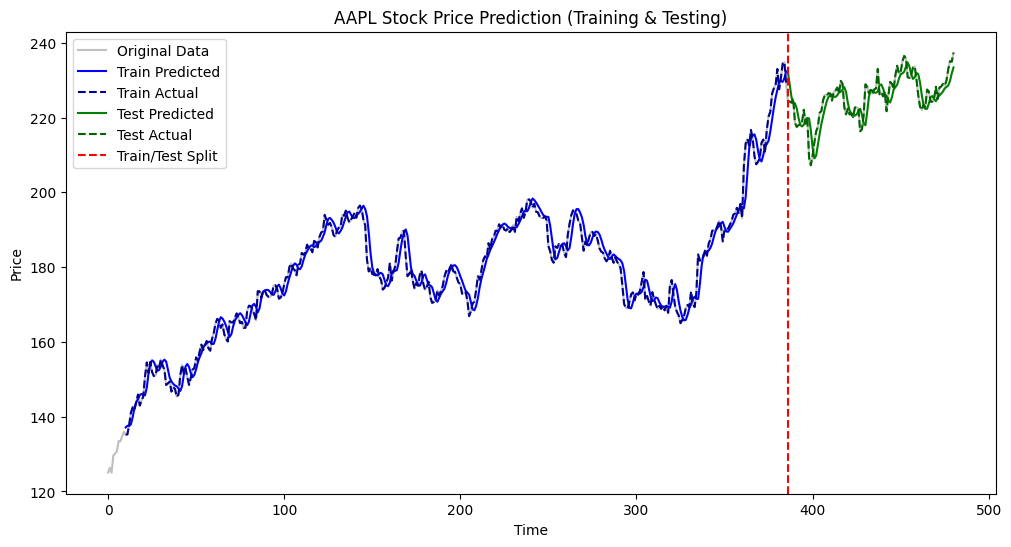

In [ ]:
# ---------------------------------------------------------------------------------------------------------------
# 2. RNN 모델 정의
class StockPriceRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(StockPriceRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])  # 마지막 시퀀스의 출력 사용
        return x

# 모델 파라미터
input_dim = 1
hidden_dim = 32
output_dim = 1
num_layers = 1

model = StockPriceRNN(input_dim, hidden_dim, output_dim, num_layers)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 3. 모델 학습
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. 모델 평가
model.eval()

# Training 데이터 예측
train_predicted = model(X_train).detach().numpy()
y_train_actual = scaler.inverse_transform(y_train.numpy().reshape(-1, 1))
train_predicted = scaler.inverse_transform(train_predicted)

# Test 데이터 예측
test_predicted = model(X_test).detach().numpy()
y_test_actual = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))
test_predicted = scaler.inverse_transform(test_predicted)

# 결과 시각화
plt.figure(figsize=(12, 6))

# 전체 데이터 시각화
plt.plot(close_prices, label="Original Data", color="gray", alpha=0.5)

# Training 데이터 피팅 결과
plt.plot(range(SEQ_LENGTH, train_size + SEQ_LENGTH), train_predicted, label="Train Predicted", color="blue")
plt.plot(range(SEQ_LENGTH, train_size + SEQ_LENGTH), y_train_actual, label="Train Actual", color="darkblue", linestyle="dashed")

# Test 데이터 피팅 결과
plt.plot(range(train_size + SEQ_LENGTH, len(close_prices)), test_predicted, label="Test Predicted", color="green")
plt.plot(range(train_size + SEQ_LENGTH, len(close_prices)), y_test_actual, label="Test Actual", color="darkgreen", linestyle="dashed")

plt.axvline(x=train_size + SEQ_LENGTH, color="red", linestyle="--", label="Train/Test Split")
plt.legend()
plt.title(f"{ticker} Stock Price Prediction (Training & Testing)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
# ---------------------------------------------------------------------------------------------------------------